# この notebook を読み進める前に
TeX 出力のためには次のコードを読み込ませること。

In [1]:
from sympy import *
from IPython.display import display
init_printing(use_unicode=True)

 # シンボル定義
a, b, x, y, z, t = symbols('a b x y z t')
x0 = symbols('x_0')
f, g, h = symbols('f g h', cls=Function)

# 注意
sympy_01_symbol_eval_printing.ipynb や公式の[ここ](http://docs.sympy.org/latest/tutorial/gotchas.html#tutorial-gotchas-equals)を見て 
Sympy のシンボリックな方程式は `=` や `==` ではなく `Eq` で表すことを確認しておこう.

In [3]:
display(Eq(x, y))

もっと簡単な方法もある.
Sympy では `Eq` にない全ての式は解くのに使う関数によって自動的に 0 と判定される.
$a = b$ は $a - b = 0$ と同値なので,
これを使えば `x == y` の代わりに単純に `x-y` が使える.

In [2]:
display(solveset(Eq(x**2, 1), x))

In [3]:
display(solveset(Eq(x**2 - 1, 0), x))

In [4]:
display(solveset(x**2 - 1, x))

解きたい方程式がはじめから $= 0$ なら特に便利.
`solveset(Eq(expr, 0), x)` と書く代わりに単に `solveset(expr, x)` と書けばいい.

# 方程式を代数的に解く
代数方程式を解くときの主力は `solveset()` だ.
`solveset()` の構文は次の通り: `solveset(equation, variable=None, domain=S.Complexes)`.
ほかにも `solve()` という関数もある:
構文は `solve(equations, variables)` だ.
しかし `solveset()`  を使った方がいい (らしい).

単独の方程式を解くとき, `solveset()` の結果は `FiniteSet` か `Interval` か `ImageSet` だ.

In [5]:
display(solveset(x**2 - x, x))

In [6]:
display(solveset(x**2 + 1, x))

In [7]:
display(solveset(x - x, x, domain=S.Reals))

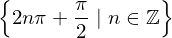

In [8]:
display(solveset(sin(x) - 1, x, domain=S.Reals))

In [9]:
a = imageset(Lambda(x, 2*x), S.Integers)
display(a)

階がない時は `EmptySet` が返る.
解を見つけられない場合は `ConditionSet` が返る.

In [13]:
display(solveset(exp(x), x))     # No solution exists
display(solveset(cos(x) - x, x))  # Not able to find solution

`solveset()` モジュールの中で 1 次方程式系を解くときは `linsolve()` が使われる.
`linsolve()` の構文は次の通り.

## 方程式のリスト形式

In [16]:
display(linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z)))

## 拡張行列形式

In [17]:
display(linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z)))

## $Ax = b$ 形式

In [18]:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
display(linsolve(system, x, y, z))

`solveset()` は解を 1 つしか出してくれない.
多項式に関して重複度つきで解がほしいなら `roots()` を使う.

In [10]:
display(solveset(x**3 - 6*x**2 + 9*x, x))

In [11]:
display(roots(x**3 - 6*x**2 + 9*x, x))

`roots()' の出力 {0: 1, 3: 2} は 0 が重複度 1 の根で 3 が重複度 2 の根であることを意味する.

# 注意
Sympy 1.0 で `solveset()` は次の方程式系を解くのには使えない.

- 非線型の多値系
- (超越方程式のソルバー) LambertW で解ける方程式

`solve()` は上のような場合にも使える.

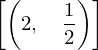

In [12]:
display(solve([x*y - 1, x - 2], x, y))

In [13]:
display(solve(x*exp(x) - 1, x ))

# 常微分方程式を解く
常微分方程式を解くには `dsolve` を使う.
まず関数を表す変数を準備する.

In [27]:
f, g = symbols('f g', cls=Function)

`f(x)` で未知の関数を表せる.

In [28]:
display(f(x))

`f(x)` の導関数は未評価になる.

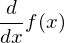

In [29]:
display(f(x).diff(x))

次の微分方程式は Sympy では次のように書ける.
\begin{align}
 f''(x) − 2f'(x) + f(x) = \sin(x).
\end{align}

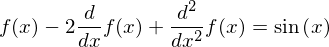

In [30]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
display(diffeq)

常微分方程式を解くには解きたい方程式を `dsolve()` に渡せばいい.

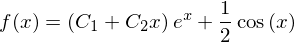

In [31]:
display(dsolve(diffeq, f(x)))

`dsolve()` は `Eq` のインスタンスを返す: 一般に微分方程式の解は明示的に書けないから.

In [32]:
display(dsolve(f(x).diff(x)*(1 - sin(f(x))), f(x)))

`dsolve()`で出てくる解の任意定数には $C_1, C_2$ といった形のシンボルが使われる.